In [1]:
# pip install pandas numpy scikit-learn matplotlib yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

from graphing import graph_normal, show_results, graph_line
from results import get_num_correct_direction_difference
from get_data import get_apple_stock_split , get_recent_apple_stock_split

In [3]:
scaler_X = StandardScaler()
scaler_Y = StandardScaler()

DAYS_LAG = 20

X_train, X_test, y_train, y_test = get_apple_stock_split(DAYS_LAG)
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

X_train = scaler_X.fit_transform(X_train)
y_train = scaler_Y.fit_transform(y_train)

X_test = scaler_X.transform(X_test)
y_test = scaler_Y.transform(y_test)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Training samples: 1772, Testing samples: 444


<h1> GridSearch setup </h1>

In [4]:
# Define the different hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [5]:
#training
model = KNeighborsRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,                       # cross-validation
    scoring='neg_mean_absolute_error',         # Use mse as scoring
    verbose=4,
    n_jobs=-1                   # Use all available cores
)

# Perform grid search on training data
grid_search.fit(X_train, y_train.ravel())

results_df = pd.DataFrame(grid_search.cv_results_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [6]:
show_results(grid_search.cv_results_)

Rank 1:
Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Mean Test Score: -0.5998
Std Dev of Test Score: 0.0127
------------------------------
Rank 2:
Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Mean Test Score: -0.6011
Std Dev of Test Score: 0.0146
------------------------------
Rank 3:
Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Mean Test Score: -0.6017
Std Dev of Test Score: 0.0165
------------------------------
Rank 4:
Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Mean Test Score: -0.6024
Std Dev of Test Score: 0.0184
------------------------------
Rank 5:
Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Mean Test Score: -0.6116
Std Dev of Test Score: 0.0217
------------------------------
Rank 6:
Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Mean Test Score: -0.6126
Std Dev of Test Score: 0.0230
--------

In [7]:
# use best model to predict test data
final_model = grid_search.best_estimator_

# Predict on test data
predictions = scaler_Y.inverse_transform(final_model.predict(X_test).reshape(-1,1))
actual = scaler_Y.inverse_transform(y_test)

mae = mean_absolute_error(actual, predictions)
mse = mean_squared_error(actual, predictions)
rmse = np.sqrt(mse)

print(f"Final Model RMSE: {rmse}")
print(f"Final Model MAE: {mae}")

Final Model RMSE: 1.7686125728671025
Final Model MAE: 0.9945954703711891


[*********************100%***********************]  1 of 1 completed


RMSE: 3.2029556245263815
MAE: 2.4301697465583962


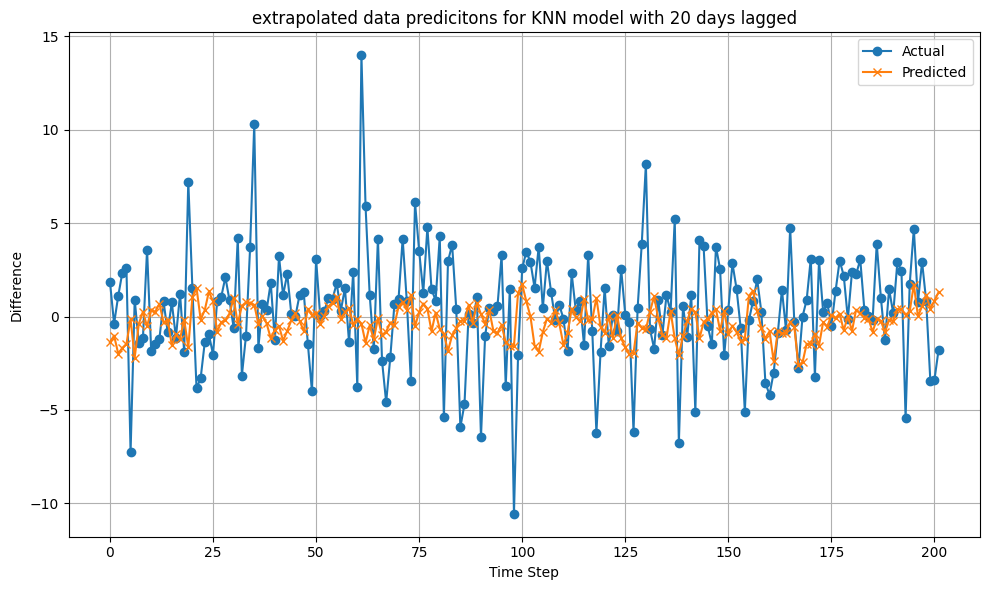

Price   Ticker
Target            85
dtype: int64 correct directions out of a total: 202


/mnt/c/Users/kenan/dev/university_final_year_project/venv_linux/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Price   Ticker
Target            85
dtype: int64

In [9]:
# trying to predict more recent ones
X, y = get_recent_apple_stock_split(DAYS_LAG)


X_scaled = scaler_X.transform(X)
predictions = scaler_Y.inverse_transform(grid_search.best_estimator_.predict(X_scaled).reshape(-1,1))

mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
#graph_normal(predictions, y, "recent data predicitons")
graph_line(predictions, y, f"extrapolated data predicitons for KNN model with {DAYS_LAG} days lagged")
get_num_correct_direction_difference(predictions,y)